# 01. Exploratory Data Analysis (EDA)

Notebook này thực hiện phân tích khám phá dữ liệu để hiểu về:
- Cấu trúc và kích thước dataset
- Phân phối các biến
- Mối quan hệ giữa features và target
- Missing values và outliers
- Insights ban đầu về dữ liệu

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Import project modules
import sys
from pathlib import Path

# Calculate project root by finding directory with config folder
# This works regardless of where Jupyter kernel is started from
current_path = Path().resolve()
project_root = current_path

# Find project root by looking for config/ directory
max_levels = 5  # Don't go up more than 5 levels
for _ in range(max_levels):
    if (project_root / 'config').exists() and (project_root / 'src').exists():
        break
    if project_root.parent == project_root:
        break
    project_root = project_root.parent
else:
    # Fallback: if running from notebooks/, go up one level
    if 'notebooks' in str(current_path):
        project_root = current_path.parent

# Add src to Python path
src_path = project_root / 'src'
if src_path.exists():
    sys.path.insert(0, str(src_path))
else:
    print(f"Warning: Could not find src directory at {src_path}")
    print(f"Current working directory: {current_path}")
    print(f"Project root: {project_root}")

# Now import from data module
from data.load_data import load_raw_data, inspect_data

## 1. Load Data

In [3]:
# Load raw data
df = load_raw_data()

# Basic inspection
inspect_data(df)

DATASET INFORMATION
Shape: (12330, 18)

Columns: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

Data types:
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

M

## 2. Data Overview

In [4]:
# Check data types
print("Data Types:")
print(df.dtypes)
print("\n" + "="*50)

# Check for missing values
print("\nMissing Values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing Percentage': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0])

Data Types:
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


Missing Values:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


## 3. Target Variable Analysis

Target Variable Distribution:
Revenue
False    10422
True      1908
Name: count, dtype: int64

Percentage Distribution:
Revenue
False    84.525547
True     15.474453
Name: proportion, dtype: float64


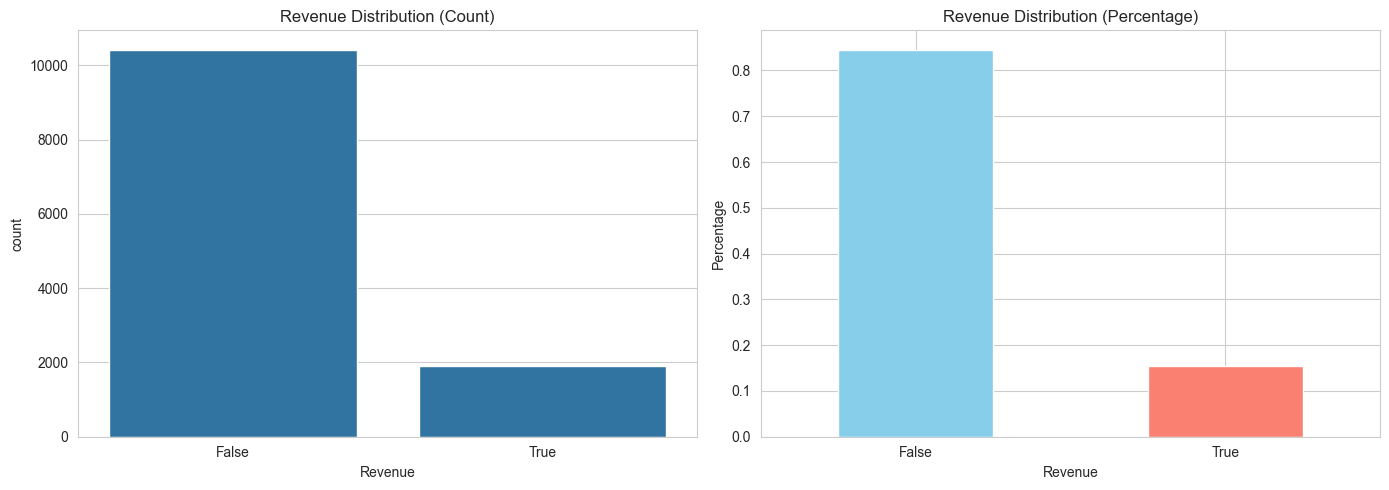


Class Imbalance Ratio: 5.46:1


In [5]:
# Analyze target variable (Revenue)
print("Target Variable Distribution:")
print(df['Revenue'].value_counts())
print(f"\nPercentage Distribution:")
print(df['Revenue'].value_counts(normalize=True) * 100)

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='Revenue', ax=axes[0])
axes[0].set_title('Revenue Distribution (Count)')
axes[0].set_xlabel('Revenue')

# Percentage plot
df['Revenue'].value_counts(normalize=True).plot(kind='bar', ax=axes[1], color=['skyblue', 'salmon'])
axes[1].set_title('Revenue Distribution (Percentage)')
axes[1].set_xlabel('Revenue')
axes[1].set_ylabel('Percentage')
axes[1].set_xticklabels(['False', 'True'], rotation=0)

plt.tight_layout()
plt.show()

print(f"\nClass Imbalance Ratio: {len(df[df['Revenue']==False]) / len(df[df['Revenue']==True]):.2f}:1")